<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"/content/diabetes.csv")
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
data["Outcome"].value_counts()   #0 = Nondiabetic
                                 #1 = diabetic

,count
Outcome,
0,500
1,268


<Axes: >

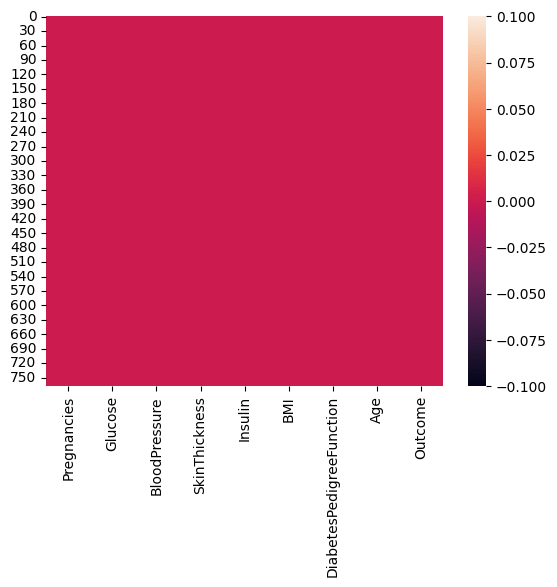

In [8]:
sns.heatmap(data.isnull())

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

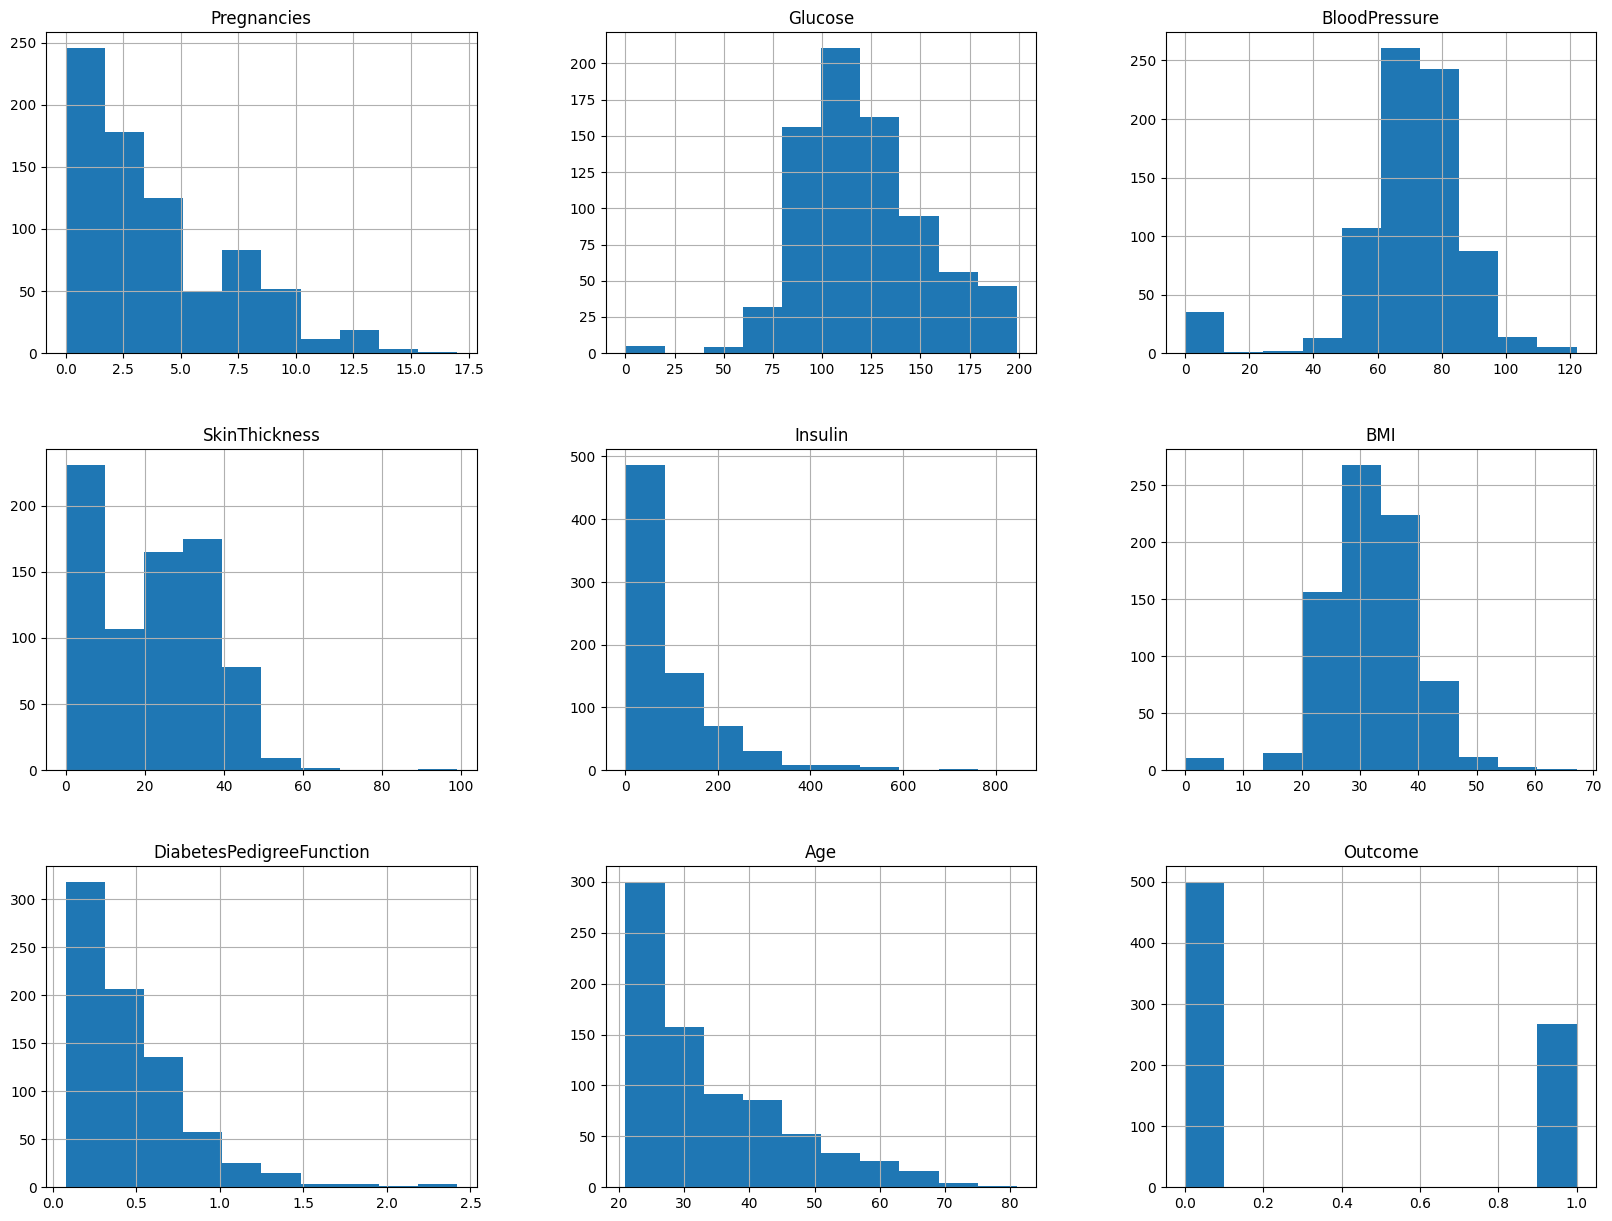

In [13]:
data.hist(figsize=(20,15))

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [ ]:
#print(x)
print(y)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


**STANDARRDSCALER**

In [19]:
# StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
print(x_train)
#print(x_test)

**LOGISTIC REGRESSION**

In [21]:
#LOGISTIC REGRESSION
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#print(x_train)
print(y_train)

In [23]:
y_pred=model.predict(x_test)

In [24]:
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [57]:
#CLASSIFICATION REPORT
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pred))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [58]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[86, 13],
       [20, 35]])

In [59]:
print("Train Accuracy:", model.score(x_train,y_train))

Train Accuracy: 0.7703583061889251


**LOGI - ACCURACY SCORE**

In [60]:
print("Test Accuracy:", model.score(x_test,y_test))

Test Accuracy: 0.7857142857142857


**LINEAR REGRESSION**

In [28]:
#LINEAR REGRESSION

model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(x_train)
print(y_train)

In [30]:
y_predi=model.predict(x_test)

In [ ]:
print(y_predi)

**LINE - ACCURACY SCORE**

In [51]:
print("Accuracy:",accuracy_score(y_test,y_predi))

Accuracy: 0.7857142857142857


In [61]:
#confusion_matrix
confusion_matrix(y_test,y_predi)

array([[86, 13],
       [20, 35]])

In [33]:
#CLASSIFICATION REPORT
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_predi))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
result=pd.DataFrame({"Actual":y_test,"predict":y_predi})
result

**RAMDOMFORESTCLASIFIER**

In [71]:
#RANDOMFORESTCLASIFIER
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
print(x_train)
print(y_train)

In [73]:
y_pre=rfc.predict(x_test)

In [ ]:
y_pre

In [75]:
print("CLASSIFICATION REPORT:")
print(classification_report(y_test,y_pre))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [76]:
#confusion_matrix
confusion_matrix(y_test,y_pre)

array([[83, 16],
       [19, 36]])

**RANDOMFO - ACCURACYSCORE**

In [77]:
print("Test accuracy:",accuracy_score(y_test,y_pre))

Test accuracy: 0.7727272727272727
